In [1]:
a = "purple is the best city in the forest"
b = "there is an art to getting your way and throwing bananas on the street is not it"  # very similier to 'g'
c = "it is not often you find soggy bananas on the street"
d = "green shold have smelled more tranquil but somehow it just tested rotten"
e = "joyce enjoyed eating pancakes with ketup"
f = "as the astroid hurtled toward earth becky was upset her dentist appointment had been canceled"
g = "to get your way you must not bombard the road with yello fruit" # very similier to 'b'

In [3]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.5 MB/s eta 0:00:00


In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
sentence_embeddings = model.encode([a, b, c, d, e, f, g])
sentence_embeddings.shape

(7, 768)

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))

for i in range(sentence_embeddings.shape[0]):
  scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

In [13]:
scores

array([[1.        , 0.17733914, 0.28297698, 0.40656054, 0.30615711,
        0.12207042, 0.21212725],
       [0.17733914, 1.00000024, 0.71785688, 0.50746971, 0.13783918,
        0.22576182, 0.6364336 ],
       [0.28297698, 0.71785688, 1.        , 0.51622927, 0.26064175,
        0.23807931, 0.54977679],
       [0.40656054, 0.50746971, 0.51622927, 1.00000024, 0.34121406,
        0.35631472, 0.44063711],
       [0.30615714, 0.1378392 , 0.26064178, 0.341214  , 1.00000024,
        0.20002493, 0.0095919 ],
       [0.12207042, 0.22576185, 0.23807932, 0.35631472, 0.20002493,
        1.        , 0.32802588],
       [0.21212724, 0.6364336 , 0.54977679, 0.44063711, 0.0095919 ,
        0.32802588, 1.00000012]])

<Axes: >

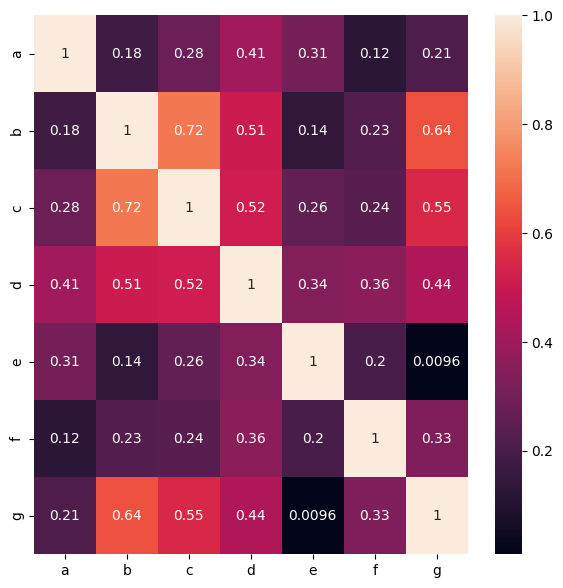

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)